

# Ofensores na Concessão de Crédito

## Importação das bibliotecas

In [21]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow import keras
from tensorflow.keras import layers

# Pacote de Interpretabilidade
import shap

# Funções customizadas
import preditiva

## Importação da base de dados

In [22]:
df = pd.read_csv('emprestimos.csv', sep=';')
df.head()

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


## Preparação dos Dados

### Missing Values

In [23]:
df.isnull().sum()

Idade                   0
Genero                  0
Escolaridade            0
Tipo_Moradia            0
Saldo_Investimento      0
Saldo_Conta_Corrente    0
Valor_Emprestimo        0
Duracao_Emprestimo      0
Default                 0
dtype: int64

### Duplicações

In [24]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [25]:
df.head(2)

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Genero                1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Default               1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

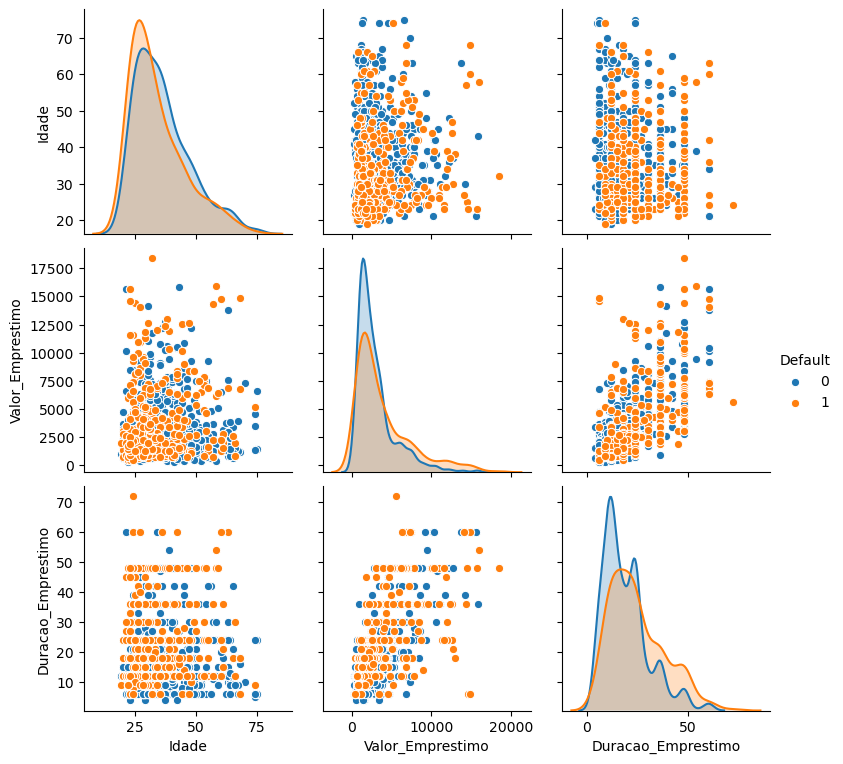

In [27]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df[['Idade','Valor_Emprestimo',
                  'Duracao_Emprestimo','Default']], 
             hue='Default');

### Análise Information Value

In [28]:
df_iv = preditiva.analise_iv(df, 'Default')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
df_iv.get_lista_iv()

,IV
Variavel,
Saldo_Conta_Corrente,0.73
Duracao_Emprestimo,0.25
Saldo_Investimento,0.20
Valor_Emprestimo,0.11
Idade,0.09
Tipo_Moradia,0.09
Genero,0.03
Escolaridade,0.01


In [30]:
df_iv.get_bivariada()

==> "Saldo_Conta_Corrente" tem IV de 0.73


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Conta_Corrente,Alto,21,87,108,10.8,7.00,12.43,19.44,0.56,-0.58,0.03
1,Saldo_Conta_Corrente,Moderado,98,126,224,22.4,32.67,18.00,43.75,1.82,0.60,0.09
2,Saldo_Conta_Corrente,Pouco,135,139,274,27.4,45.00,19.86,49.27,2.27,0.82,0.21
3,Saldo_Conta_Corrente,Sem conta,46,348,394,39.4,15.33,49.71,11.68,0.31,-1.17,0.40


==> "Duracao_Emprestimo" tem IV de 0.25


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Duracao_Emprestimo,"(3.99, 9.0]",24,119,143,14.3,8.00,17.00,16.78,0.47,-0.76,0.07
1,Duracao_Emprestimo,"(9.0, 12.0]",52,164,216,21.6,17.33,23.43,24.07,0.74,-0.30,0.02
2,Duracao_Emprestimo,"(12.0, 15.0]",13,59,72,7.2,4.33,8.43,18.06,0.51,-0.67,0.03
3,Duracao_Emprestimo,"(15.0, 18.0]",43,72,115,11.5,14.33,10.29,37.39,1.39,0.33,0.01
4,Duracao_Emprestimo,"(18.0, 24.0]",66,158,224,22.4,22.00,22.57,29.46,0.97,-0.03,0.00
5,Duracao_Emprestimo,"(24.0, 30.0]",19,38,57,5.7,6.33,5.43,33.33,1.17,0.16,0.00
6,Duracao_Emprestimo,"(30.0, 36.0]",38,48,86,8.6,12.67,6.86,44.19,1.85,0.62,0.04
7,Duracao_Emprestimo,"(36.0, 72.0]",45,42,87,8.7,15.00,6.00,51.72,2.50,0.92,0.08


==> "Saldo_Investimento" tem IV de 0.2


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Saldo_Investimento,Alto,17,94,111,11.1,5.67,13.43,15.32,0.42,-0.87,0.07
1,Saldo_Investimento,Moderado,34,69,103,10.3,11.33,9.86,33.01,1.15,0.14,0.00
2,Saldo_Investimento,Pouco,217,386,603,60.3,72.33,55.14,35.99,1.31,0.27,0.05
3,Saldo_Investimento,Sem investimento,32,151,183,18.3,10.67,21.57,17.49,0.49,-0.71,0.08


==> "Valor_Emprestimo" tem IV de 0.11


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Valor_Emprestimo,"(249.99, 932.0]",31,70,101,10.1,10.33,10.00,30.69,1.03,0.03,0.00
1,Valor_Emprestimo,"(932.0, 1262.0]",30,70,100,10.0,10.00,10.00,30.00,1.00,0.00,0.00
2,Valor_Emprestimo,"(1262.0, 1479.4]",26,73,99,9.9,8.67,10.43,26.26,0.83,-0.19,0.00
3,Valor_Emprestimo,"(1479.4, 1906.8]",22,78,100,10.0,7.33,11.14,22.00,0.66,-0.42,0.02
4,Valor_Emprestimo,"(1906.8, 2319.5]",30,70,100,10.0,10.00,10.00,30.00,1.00,0.00,0.00
5,Valor_Emprestimo,"(2319.5, 2852.4]",24,76,100,10.0,8.00,10.86,24.00,0.74,-0.30,0.01
6,Valor_Emprestimo,"(2852.4, 3590.0]",23,78,101,10.1,7.67,11.14,22.77,0.69,-0.37,0.01
7,Valor_Emprestimo,"(3590.0, 4720.0]",29,70,99,9.9,9.67,10.00,29.29,0.97,-0.03,0.00
8,Valor_Emprestimo,"(4720.0, 7179.4]",38,62,100,10.0,12.67,8.86,38.00,1.43,0.36,0.01
9,Valor_Emprestimo,"(7179.4, 18424.0]",47,53,100,10.0,15.67,7.57,47.00,2.07,0.73,0.06


==> "Idade" tem IV de 0.09


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Idade,"(18.99, 23.0]",42,63,105,10.5,14.00,9.00,40.00,1.56,0.44,0.02
1,Idade,"(23.0, 26.0]",52,83,135,13.5,17.33,11.86,38.52,1.46,0.38,0.02
2,Idade,"(26.0, 28.0]",28,66,94,9.4,9.33,9.43,29.79,0.99,-0.01,0.00
3,Idade,"(28.0, 30.0]",26,51,77,7.7,8.67,7.29,33.77,1.19,0.17,0.00
4,Idade,"(30.0, 33.0]",33,72,105,10.5,11.00,10.29,31.43,1.07,0.07,0.00
5,Idade,"(33.0, 36.0]",23,88,111,11.1,7.67,12.57,20.72,0.61,-0.49,0.02
6,Idade,"(36.0, 39.0]",18,56,74,7.4,6.00,8.00,24.32,0.75,-0.29,0.01
7,Idade,"(39.0, 45.0]",31,82,113,11.3,10.33,11.71,27.43,0.88,-0.13,0.00
8,Idade,"(45.0, 52.0]",18,72,90,9.0,6.00,10.29,20.00,0.58,-0.54,0.02
9,Idade,"(52.0, 75.0]",29,67,96,9.6,9.67,9.57,30.21,1.01,0.01,0.00


==> "Tipo_Moradia" tem IV de 0.09


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Tipo_Moradia,Alugada,70,109,179,17.9,23.33,15.57,39.11,1.50,0.41,0.03
1,Tipo_Moradia,De favor,44,64,108,10.8,14.67,9.14,40.74,1.61,0.48,0.03
2,Tipo_Moradia,Propria,186,527,713,71.3,62.00,75.29,26.09,0.82,-0.20,0.03


==> "Genero" tem IV de 0.03


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Genero,H,109,201,310,31.0,36.33,28.71,35.16,1.27,0.24,0.02
1,Genero,M,191,499,690,69.0,63.67,71.29,27.68,0.89,-0.12,0.01


==> "Escolaridade" tem IV de 0.01


Default,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Escolaridade,Ensino Medio,58,112,170,17.0,19.33,16.00,34.12,1.21,0.19,0.01
1,Escolaridade,Graduacao,186,444,630,63.0,62.00,63.43,29.52,0.98,-0.02,0.00
2,Escolaridade,Pos Graduacao,56,144,200,20.0,18.67,20.57,28.00,0.91,-0.09,0.00


### Relatórios Pandas Profiling e SweetViz

In [ ]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='Default')
sns.reset_defaults()

## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Genero                1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Default               1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [32]:
# Target (variável resposta)
y_var = 'Default'
y = df[y_var]

# Features (variáveis explicativas)
# Variáveis Numéricas
x_var_num = ['Valor_Emprestimo','Duracao_Emprestimo']
x_num = df[x_var_num]

# Variáveis Categóricas / Qualitativas
x_var_cat = ['Saldo_Investimento','Saldo_Conta_Corrente']
x_cat = df[x_var_cat]

### Pré-processamento

In [33]:
# Criação das variáveis dummies para variáveis categóricas
x_cat_enc = OneHotEncoder(drop='first', sparse=False)
x_cat = x_cat_enc.fit_transform(x_cat)
x_cat = pd.DataFrame(data=x_cat, index=None,
                     columns=list(x_cat_enc.get_feature_names(x_var_cat)))

# Unificação da base de dados
x = pd.concat([x_num, x_cat], axis=1)

In [34]:
x

,Valor_Emprestimo,Duracao_Emprestimo,Saldo_Investimento_Moderado,Saldo_Investimento_Pouco,Saldo_Investimento_Sem investimento,Saldo_Conta_Corrente_Moderado,Saldo_Conta_Corrente_Pouco,Saldo_Conta_Corrente_Sem conta
0,1169,6,0.0,0.0,1.0,0.0,1.0,0.0
1,5951,48,0.0,1.0,0.0,1.0,0.0,0.0
2,2096,12,0.0,1.0,0.0,0.0,0.0,1.0
3,7882,42,0.0,1.0,0.0,0.0,1.0,0.0
4,4870,24,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
995,1736,12,0.0,1.0,0.0,0.0,0.0,1.0
996,3857,30,0.0,1.0,0.0,0.0,1.0,0.0
997,804,12,0.0,1.0,0.0,0.0,0.0,1.0
998,1845,45,0.0,1.0,0.0,0.0,1.0,0.0


### Divisão das bases em Treino e Teste

In [16]:
# Divisão em treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Padronização da Escala

In [17]:
# Padronização da Escala usando conjunto de treino
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

### Modelo Simples: Regressão Logística

In [35]:
# Define estrutura e configurações do modelo
modelo_rl = LogisticRegression(fit_intercept=True,
                               random_state = 42)

# Ajusta o modelo
modelo_rl.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=42)

In [36]:
# Obtenção dos coeficientes do modelo
print(f'Intercepto:\t\t  {modelo_rl.intercept_[0]:.3f}')

feat_lst = x_var_num + list(x_cat_enc.get_feature_names(x_var_cat))
for i, feat in enumerate(feat_lst):
    print(f'Coeficientes {feat}:\t {modelo_rl.coef_[0][i]:.3f}')

Intercepto:		  -1.727
Coeficientes Valor_Emprestimo:	 0.000
Coeficientes Duracao_Emprestimo:	 0.032
Coeficientes Saldo_Investimento_Moderado:	 0.016
Coeficientes Saldo_Investimento_Pouco:	 0.258
Coeficientes Saldo_Investimento_Sem investimento:	 -0.453
Coeficientes Saldo_Conta_Corrente_Moderado:	 0.200
Coeficientes Saldo_Conta_Corrente_Pouco:	 0.612
Coeficientes Saldo_Conta_Corrente_Sem conta:	 -1.090


In [20]:
# Métricas de Desempenho
preditiva.calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

,Treino,Teste,Variação
Acurácia,0.741429,0.723333,-0.02
AUROC,0.739576,0.795941,0.08
KS,0.382366,0.484989,0.27
Precision,0.640000,0.600000,-0.06
Recall,0.306220,0.263736,-0.14
F1,0.414239,0.366412,-0.12
